# بسم الله الرحمن الرحيم

In [41]:
from utils import *
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt 


In [42]:
df = pd.read_csv("dataset/body_level_classification_train.csv")
df_original= cleaning_data(df).copy()
all_class_train,all_class_test=data_spliting(df_original,1/3)
## shuffling 
all_class_train = all_class_train.sample(frac=1.0, random_state=42)
all_class_test = all_class_test.sample(frac=1.0, random_state=42)
X_train=all_class_train.drop(["Body_Level"],axis=1).to_numpy()
Y_train=all_class_train["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()


X_train, scaler= data_scaling(X_train)
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [43]:
class_weights = all_class_train["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}
class_weights

{3: 0.5429515418502202,
 2: 0.9095940959409594,
 1: 1.8395522388059702,
 0: 1.9409448818897639}

In [44]:

# Define the random forest model
model = RandomForestClassifier(random_state=42,class_weight=class_weights)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500,600],
    'max_depth': [10, 20, 30, None],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=None,verbose=2)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.4s
[CV] END .....................max_depth=10, n_e

[CV] END .....................max_depth=30, n_estimators=600; total time=   0.9s
[CV] END .....................max_depth=30, n_estimators=600; total time=   0.9s
[CV] END .....................max_depth=30, n_estimators=600; total time=   0.9s
[CV] END .....................max_depth=30, n_estimators=600; total time=   0.9s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................

In [45]:
accuracy, repo = test_model(grid_search.best_estimator_,X_train,Y_train ,axis=False)


In [46]:
accuracy

1.0

In [47]:
print(repo) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       271
           3       1.00      1.00      1.00       454

    accuracy                           1.00       986
   macro avg       1.00      1.00      1.00       986
weighted avg       1.00      1.00      1.00       986



In [48]:
accuracy, repo = test_model(grid_search.best_estimator_,X_val,Y_val ,axis=False)

In [49]:
accuracy

0.9428571428571428

In [50]:
print(repo) 

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.75      0.87      0.81        31
           2       0.91      0.93      0.92        55
           3       1.00      0.98      0.99       124

    accuracy                           0.94       245
   macro avg       0.92      0.92      0.92       245
weighted avg       0.95      0.94      0.94       245



In [51]:
accuracy, repo = test_model(grid_search.best_estimator_,X_test,Y_test ,axis=False)

In [52]:
accuracy

0.9105691056910569

In [53]:
print(repo) 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.80      0.78      0.79        36
           2       0.87      0.90      0.88        80
           3       0.96      0.96      0.96       102

    accuracy                           0.91       246
   macro avg       0.91      0.89      0.90       246
weighted avg       0.91      0.91      0.91       246



In [54]:
cv_results = grid_search.cv_results_

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(params, mean_score)

{'max_depth': 10, 'n_estimators': 50} 0.9259652361175205
{'max_depth': 10, 'n_estimators': 100} 0.9290109213967082
{'max_depth': 10, 'n_estimators': 200} 0.9259652361175205
{'max_depth': 10, 'n_estimators': 300} 0.9310413782495001
{'max_depth': 10, 'n_estimators': 400} 0.9340768086960981
{'max_depth': 10, 'n_estimators': 500} 0.9300261498231042
{'max_depth': 10, 'n_estimators': 600} 0.9310259960006153
{'max_depth': 20, 'n_estimators': 50} 0.9289904117315286
{'max_depth': 20, 'n_estimators': 100} 0.938122340152797
{'max_depth': 20, 'n_estimators': 200} 0.9401527970055887
{'max_depth': 20, 'n_estimators': 300} 0.938122340152797
{'max_depth': 20, 'n_estimators': 400} 0.939137568579193
{'max_depth': 20, 'n_estimators': 500} 0.9401476695892941
{'max_depth': 20, 'n_estimators': 600} 0.9401476695892941
{'max_depth': 30, 'n_estimators': 50} 0.9289904117315286
{'max_depth': 30, 'n_estimators': 100} 0.938122340152797
{'max_depth': 30, 'n_estimators': 200} 0.9401527970055887
{'max_depth': 30, 'n_

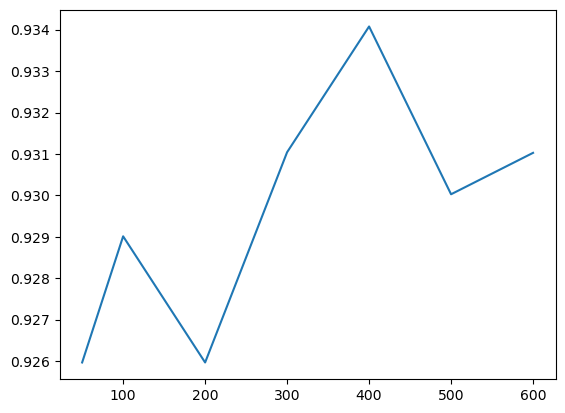

In [55]:
estimators_max_depth_10 = []
accuracies_max_depth_10 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==10):
        estimators_max_depth_10.append(params["n_estimators"])
        accuracies_max_depth_10.append(mean_score)
        
estimators_max_depth_10
accuracies_max_depth_10

plt.plot(estimators_max_depth_10,accuracies_max_depth_10)
plt.show()




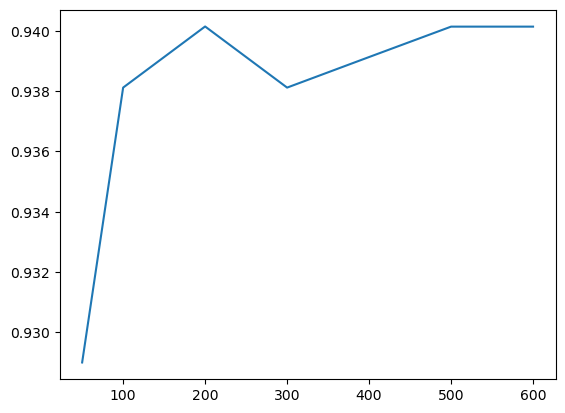

In [56]:
estimators_max_depth_30 = []
accuracies_max_depth_30 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==30):
        estimators_max_depth_30.append(params["n_estimators"])
        accuracies_max_depth_30.append(mean_score)
        


plt.plot(estimators_max_depth_30,accuracies_max_depth_30)
plt.show()



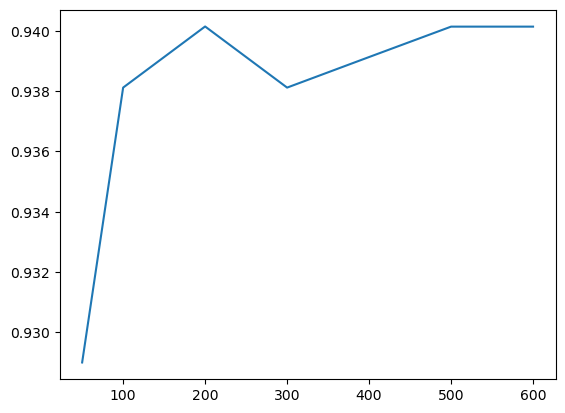

In [57]:
estimators_max_depth_None = []
accuracies_max_depth_None = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==None):
        estimators_max_depth_None.append(params["n_estimators"])
        accuracies_max_depth_None.append(mean_score)
        


plt.plot(estimators_max_depth_None,accuracies_max_depth_None)
plt.show()



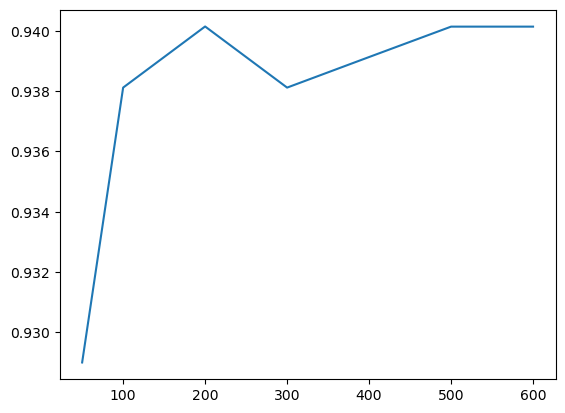

In [58]:
estimators_max_depth_20 = []
accuracies_max_depth_20 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==20):
        estimators_max_depth_20.append(params["n_estimators"])
        accuracies_max_depth_20.append(mean_score)
        


plt.plot(estimators_max_depth_20,accuracies_max_depth_20)
plt.show()

# oversampling 

In [59]:
oversampled= over_sampling(all_class_train,sampling_ratio=0.5)
class_weights = oversampled["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}
class_weights

X_train=oversampled.drop(["Body_Level"],axis=1).to_numpy()
Y_train=oversampled["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()
X_train, scaler= data_scaling(X_train)
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [60]:

# Define the random forest model
model = RandomForestClassifier(random_state=42,class_weight=class_weights)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500,600],
    'max_depth': [10, 20, 30, None],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=None,verbose=2)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.4s
[CV] END .....................max_depth=10, n_e

[CV] END .....................max_depth=30, n_estimators=600; total time=   1.3s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.2s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.1s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................

In [61]:
cv_results = grid_search.cv_results_

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(params, mean_score)

{'max_depth': 10, 'n_estimators': 50} 0.954398548219841
{'max_depth': 10, 'n_estimators': 100} 0.9559252217997466
{'max_depth': 10, 'n_estimators': 200} 0.9551705265583592
{'max_depth': 10, 'n_estimators': 300} 0.9582065906210394
{'max_depth': 10, 'n_estimators': 400} 0.9589670468948036
{'max_depth': 10, 'n_estimators': 500} 0.960487959442332
{'max_depth': 10, 'n_estimators': 600} 0.9597303836847562
{'max_depth': 20, 'n_estimators': 50} 0.9612368936513424
{'max_depth': 20, 'n_estimators': 100} 0.9635182624726351
{'max_depth': 20, 'n_estimators': 200} 0.9635153819564467
{'max_depth': 20, 'n_estimators': 300} 0.9642758382302109
{'max_depth': 20, 'n_estimators': 400} 0.9680723585666552
{'max_depth': 20, 'n_estimators': 500} 0.9673119022928909
{'max_depth': 20, 'n_estimators': 600} 0.9673119022928909
{'max_depth': 30, 'n_estimators': 50} 0.9612368936513424
{'max_depth': 30, 'n_estimators': 100} 0.9635182624726351
{'max_depth': 30, 'n_estimators': 200} 0.9635125014402581
{'max_depth': 30, '

In [62]:
accuracy, repo = test_model(grid_search.best_estimator_,X_train,Y_train ,axis=False)


In [63]:
accuracy

1.0

In [64]:
print(repo) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       262
           2       1.00      1.00      1.00       344
           3       1.00      1.00      1.00       454

    accuracy                           1.00      1317
   macro avg       1.00      1.00      1.00      1317
weighted avg       1.00      1.00      1.00      1317



In [65]:
accuracy, repo = test_model(grid_search.best_estimator_,X_val,Y_val ,axis=False)


In [66]:
accuracy

0.9510204081632653

In [67]:
print(repo)

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.77      0.87      0.82        31
           2       0.93      0.95      0.94        55
           3       1.00      0.98      0.99       124

    accuracy                           0.95       245
   macro avg       0.93      0.93      0.93       245
weighted avg       0.96      0.95      0.95       245



In [68]:
accuracy, repo = test_model(grid_search.best_estimator_,X_test,Y_test ,axis=False)


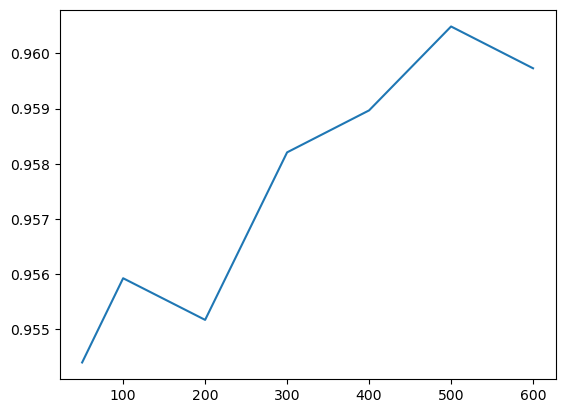

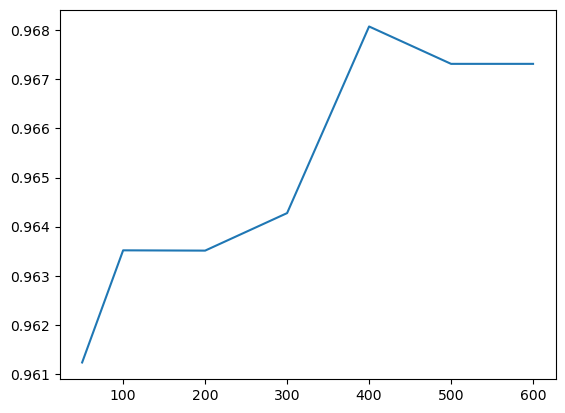

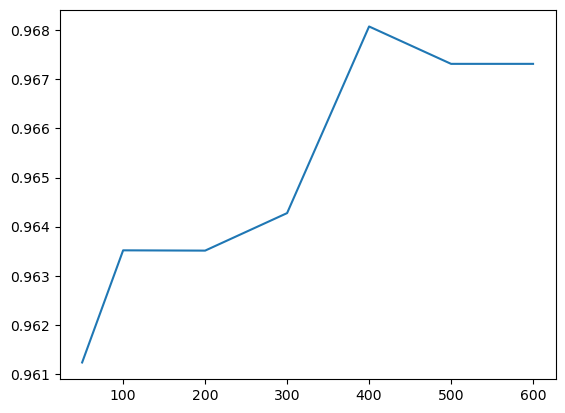

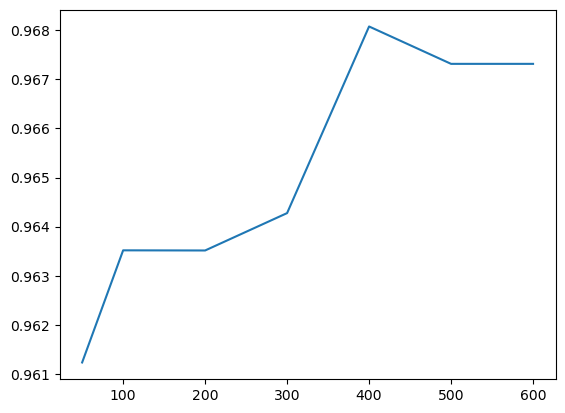

In [69]:
estimators_max_depth_10 = []
accuracies_max_depth_10 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==10):
        estimators_max_depth_10.append(params["n_estimators"])
        accuracies_max_depth_10.append(mean_score)
        
estimators_max_depth_10
accuracies_max_depth_10

plt.plot(estimators_max_depth_10,accuracies_max_depth_10)
plt.show()


estimators_max_depth_30 = []
accuracies_max_depth_30 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==30):
        estimators_max_depth_30.append(params["n_estimators"])
        accuracies_max_depth_30.append(mean_score)
        


plt.plot(estimators_max_depth_30,accuracies_max_depth_30)
plt.show()

estimators_max_depth_None = []
accuracies_max_depth_None = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==None):
        estimators_max_depth_None.append(params["n_estimators"])
        accuracies_max_depth_None.append(mean_score)
        


plt.plot(estimators_max_depth_None,accuracies_max_depth_None)
plt.show()

estimators_max_depth_20 = []
accuracies_max_depth_20 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==20):
        estimators_max_depth_20.append(params["n_estimators"])
        accuracies_max_depth_20.append(mean_score)
        


plt.plot(estimators_max_depth_20,accuracies_max_depth_20)
plt.show()